# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Monthly Shampoo Sales 

Sofia Velasquez 22049

José Marchena 22398


### 0. Obtencion de datos

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%m-%d')
shampoo_sales = pd.read_csv(
    './data/shampoo.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)
print(shampoo_sales.shape)

(36, 1)


C:\Users\50250\AppData\Local\Temp\ipykernel_26716\859017919.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  shampoo_sales = pd.read_csv(


### 1. Analisis Exploratorio

Description
            Sales
count   36.000000
mean   312.600000
std    148.937164
min    119.300000
25%    192.450000
50%    280.150000
75%    411.100000
max    682.000000
Frequency distribution


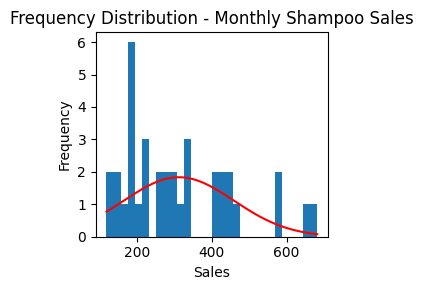

Time Series


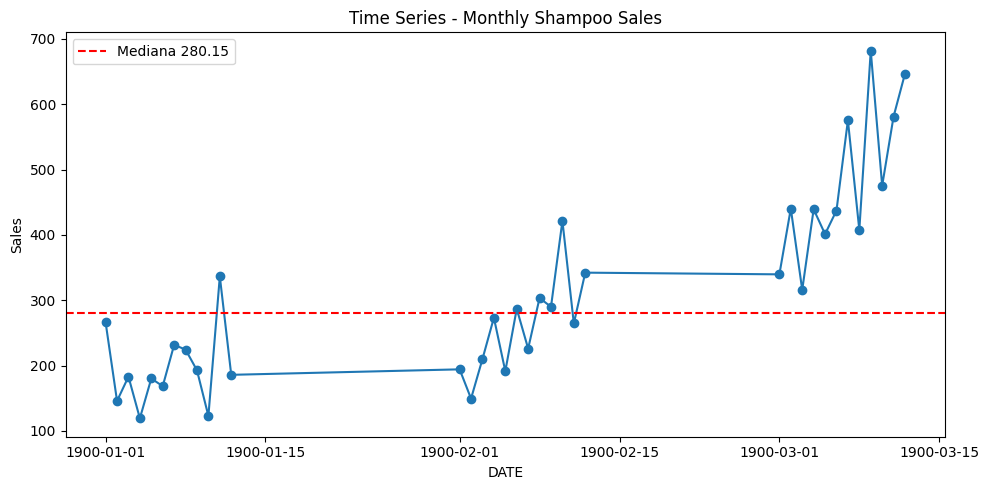

Seasonal Decompose


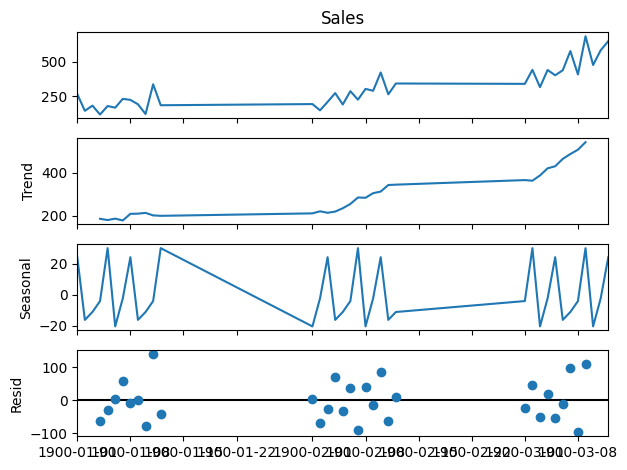

In [23]:
from scripts import analysis_graphs

value = "Sales"
title = "Monthly Shampoo Sales"

analysis_graphs(
    shampoo_sales,
    value,
    title
)

### 2. Moving Average

ACF plot


ValueError: could not broadcast input array from shape (36,) into shape (51,)

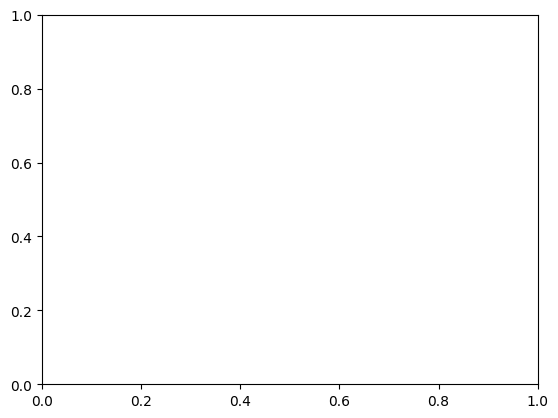

In [24]:
from scripts import moving_average

moving_average(shampoo_sales, value, title, 7)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


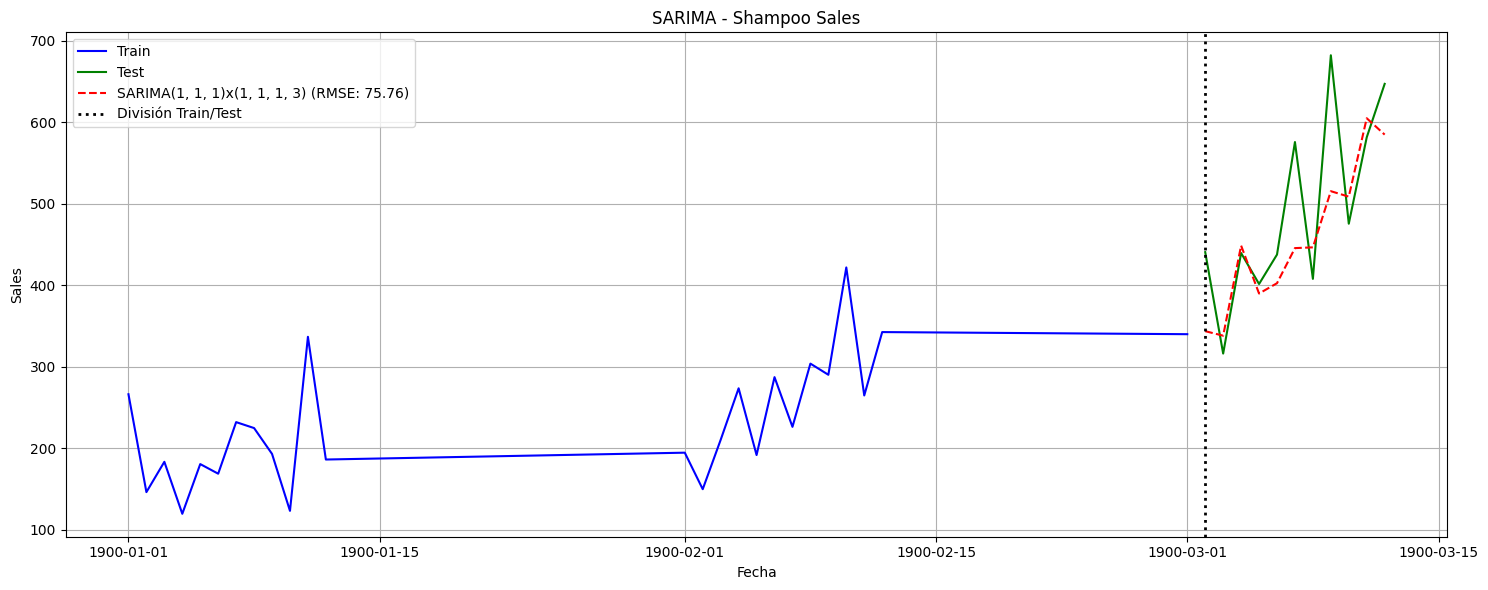

Modelo SARIMA (1, 1, 1)x(1, 1, 1, 3) ajustado.
RMSE: 75.76, MAE: 57.22


In [9]:
from scripts import sarima_model

# Aplicar el modelo SARIMA
sarima_model(shampoo_sales.copy(), 'Month', 'Sales', order=(1,1,1), seasonal_order=(1,1,1,3), title="Shampoo Sales")

*Parámetros: (1,1,1)(1,1,1,3)*

- Usé m=3 ya que los datos son mensuales y parecen tener una estacionalidad trimestral.

### 6. Modelar serie de tiempo con Prophet

In [10]:
# !pip install plotly
# !pip install prophet

14:07:00 - cmdstanpy - INFO - Chain [1] start processing
14:07:00 - cmdstanpy - INFO - Chain [1] done processing


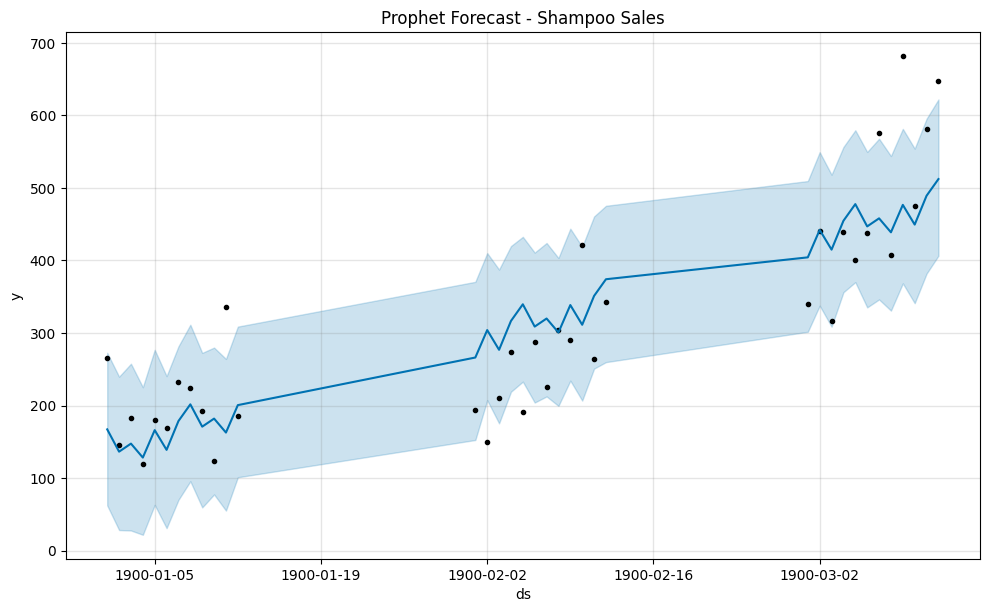

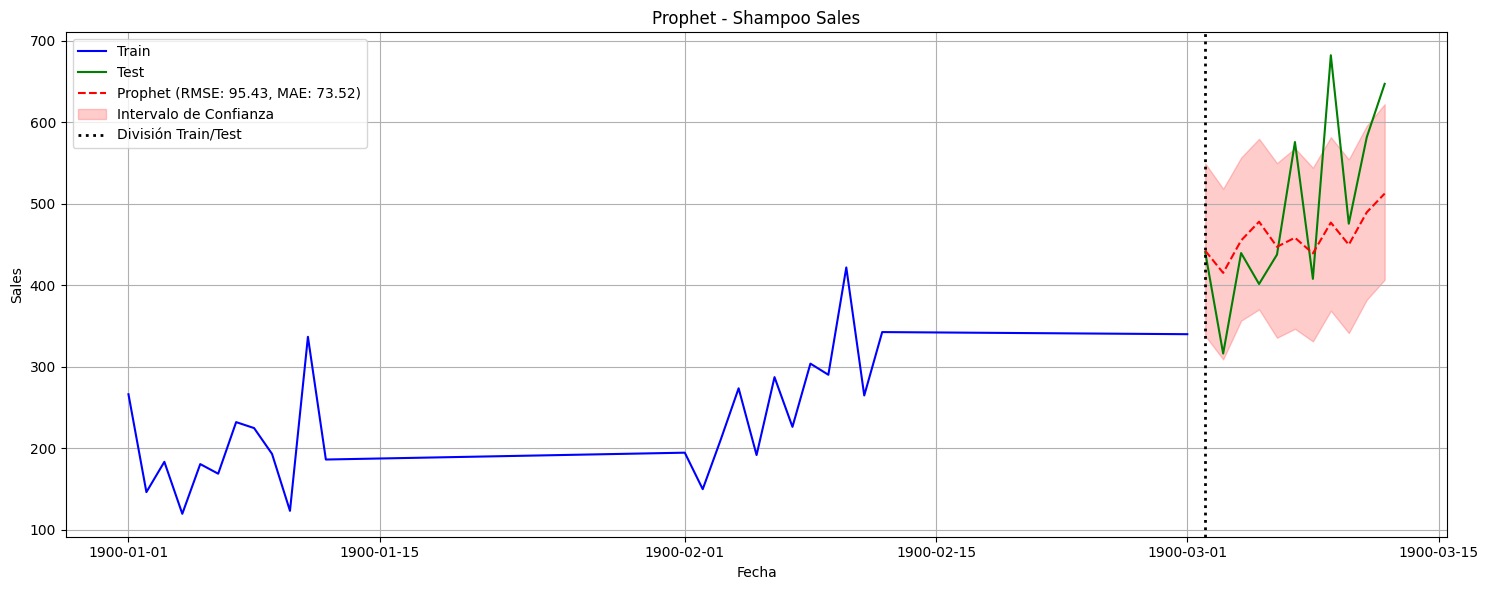

Shampoo Sales - Prophet RMSE: 95.43, MAE: 73.52


In [11]:
from scripts import apply_prophet

# Aplicar Prophet
apply_prophet(shampoo_sales.copy(), 'Month', 'Sales', title="Shampoo Sales")

### Comparación de modelos 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


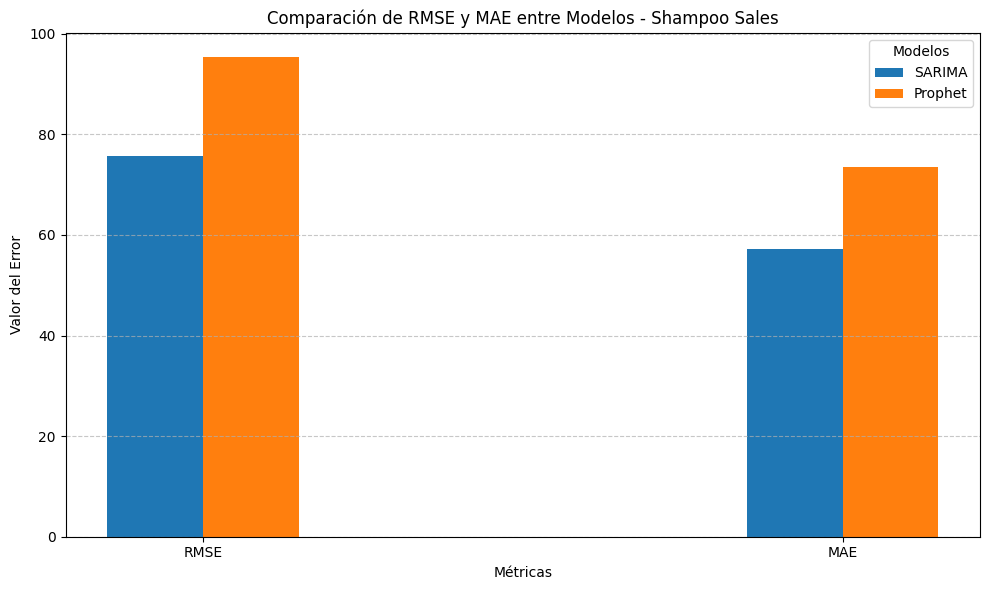

In [1]:
from scripts import plot_model_comparison
model_metrics = {
    "SARIMA": {"RMSE": 75.76, "MAE": 57.22},
    "Prophet": {"RMSE": 95.43, "MAE": 73.52}
    }

plot_model_comparison(model_metrics, title="Comparación de RMSE y MAE entre Modelos - Shampoo Sales")
